In [ ]:
# Generation of the scatterplot which correlates distances (phylo) & the min distance within vcontact network.

### Input files needed:
# - Pickles generated in notebook C (distances).

In [1]:
import pickle
import pandas as pd
import os
import seaborn as sns
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font='arial')
sns.set_style("white")
sns.set_style("ticks")

In [2]:
MCL_P0 = pickle.load(open('data/MCL_PC0_nxgraphdists.pickle', 'rb'))
mclp0 = pd.DataFrame(MCL_P0)
mclp0.columns = ['phylo','node1','node2','branchlength','dijkstralength','dijkstra/numedg','numedg', 'mixed']
mclp0['phylo'] = 'PC0'
print('mcl P0 = done')
MCL_P1 = pickle.load(open('data/MCL_PC1_nxgraphdists.pickle', 'rb'))
mclp1 = pd.DataFrame(MCL_P1)
mclp1.columns = ['phylo','node1','node2','branchlength','dijkstralength','dijkstra/numedg','numedg', 'mixed']
mclp1['phylo'] = 'PC1'
print('mcl P1 = done')
MCL_P2 = pickle.load(open('data/MCL_PC2_nxgraphdists.pickle', 'rb'))
mclp2 = pd.DataFrame(MCL_P2)
mclp2.columns = ['phylo','node1','node2','branchlength','dijkstralength','dijkstra/numedg','numedg', 'mixed']
mclp2['phylo'] = 'PC2'
print('mcl P2 = done')
MCL_P3 = pickle.load(open('data/MCL_PC3_nxgraphdists.pickle', 'rb'))
mclp3 = pd.DataFrame(MCL_P3)
mclp3.columns = ['phylo','node1','node2','branchlength','dijkstralength','dijkstra/numedg','numedg', 'mixed']
mclp3['phylo'] = 'PC3'
print('mcl P3 = done')
MCL_P4 = pickle.load(open('data/MCL_PC4_nxgraphdists.pickle', 'rb'))
mclp4 = pd.DataFrame(MCL_P4)
mclp4.columns = ['phylo','node1','node2','branchlength','dijkstralength','dijkstra/numedg','numedg', 'mixed']
mclp4['phylo'] = 'PC4'
print('mcl P4 = done')

mcl P0 = done
mcl P1 = done
mcl P2 = done
mcl P3 = done
mcl P4 = done


In [4]:
mcldf = pd.concat([mclp0,mclp1,mclp2,mclp3,mclp4])
mcldf.columns = ['phylo','node1','node2','Branchlength distance between tips','dijkstralength','dijkstra/numedg','Minimum number of edges between nodes','mixed']

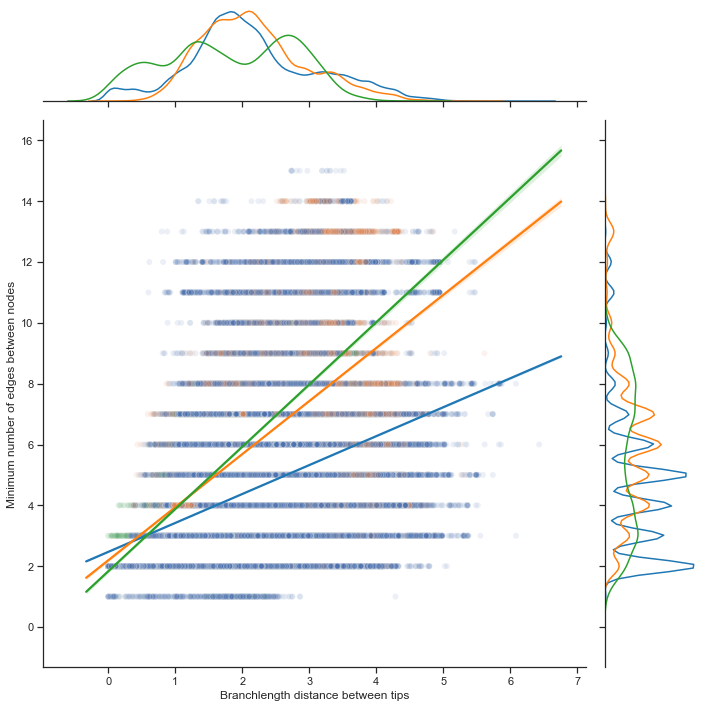

In [5]:
#Fetch correlations:
#spearmans = []
#spearmans.append(scipy.stats.spearmanr(mcldf[mcldf['mixed'] == 'Ref']['branchlength'], mcldf[mcldf['mixed'] == 'Ref']['numedg'])[0:2])
#spearmans.append(scipy.stats.spearmanr(mcldf[mcldf['mixed'] == 'Mixed']['branchlength'], mcldf[mcldf['mixed'] == 'Mixed']['numedg'])[0:2])
#spearmans.append(scipy.stats.spearmanr(mcldf[mcldf['mixed'] == 'Nodes']['branchlength'], mcldf[mcldf['mixed'] == 'Nodes']['numedg'])[0:2])


grid = sns.JointGrid(x='Branchlength distance between tips', y='Minimum number of edges between nodes', data=mcldf, height=10)

g = grid.plot_joint(sns.scatterplot, hue='mixed', data=mcldf, alpha=0.1,legend=False)
g = sns.regplot(x='Branchlength distance between tips', y="Minimum number of edges between nodes", data=mcldf[mcldf['mixed'] == 'Ref'], scatter=False, color='#1f77b4',x_estimator=np.mean, ci=90)
g = sns.regplot(x='Branchlength distance between tips', y="Minimum number of edges between nodes", data=mcldf[mcldf['mixed'] == 'Mixed'], scatter=False, color='#ff7f0e',x_estimator=np.mean, ci=90)
g = sns.regplot(x='Branchlength distance between tips', y="Minimum number of edges between nodes", data=mcldf[mcldf['mixed'] == 'Nodes'], scatter=False, color='#2ca02c',x_estimator=np.mean, ci=90)

g = sns.kdeplot(mcldf.loc[mcldf['mixed'] == 'Ref', 'Branchlength distance between tips'], ax=grid.ax_marg_x, legend=False, color='#1f77b4')
g = sns.kdeplot(mcldf.loc[mcldf['mixed'] == 'Mixed', 'Branchlength distance between tips'], ax=grid.ax_marg_x, legend=False, color='#ff7f0e')
g = sns.kdeplot(mcldf.loc[mcldf['mixed'] == 'Nodes', 'Branchlength distance between tips'], ax=grid.ax_marg_x, legend=False, color='#2ca02c')
g = sns.kdeplot(mcldf.loc[mcldf['mixed'] == 'Ref', 'Minimum number of edges between nodes'], ax=grid.ax_marg_y, vertical=True, legend=False, color='#1f77b4')
g = sns.kdeplot(mcldf.loc[mcldf['mixed'] == 'Mixed', 'Minimum number of edges between nodes'], ax=grid.ax_marg_y, vertical=True, legend=False, color='#ff7f0e')
g = sns.kdeplot(mcldf.loc[mcldf['mixed'] == 'Nodes', 'Minimum number of edges between nodes'], ax=grid.ax_marg_y, vertical=True, legend=False, color='#2ca02c')

g.figure.savefig('figures/Lengthvsedge.png',dpi=300)

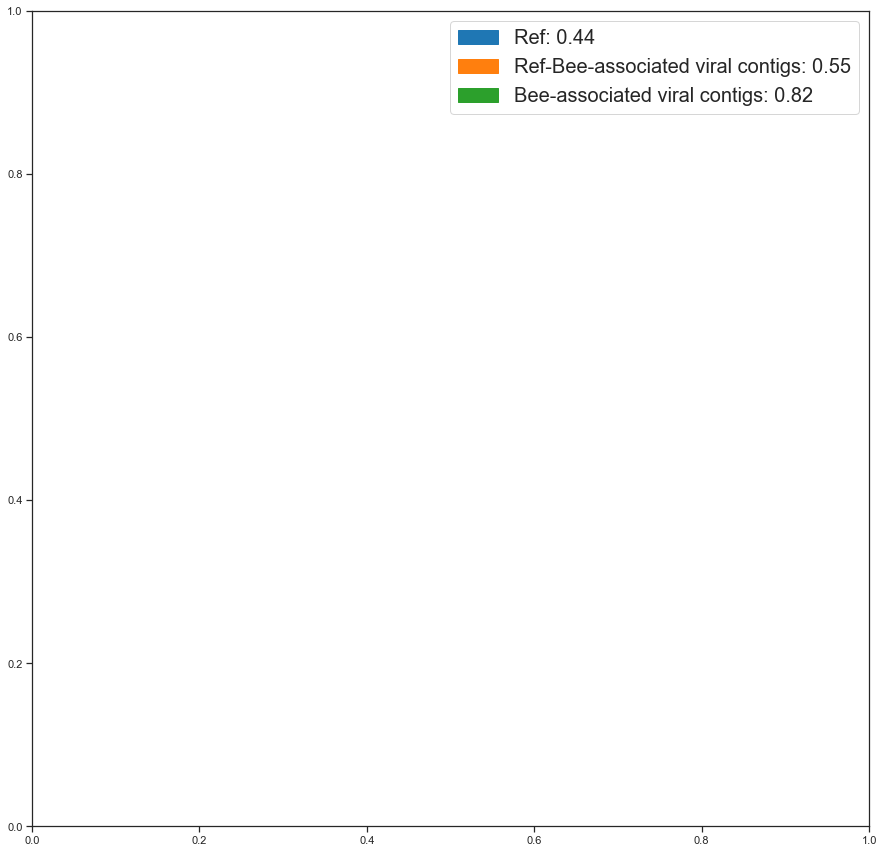

In [7]:
#Legend seperately
ref = mpatches.Patch(color='#1f77b4', label='Ref: 0.44')
mix = mpatches.Patch(color='#ff7f0e', label='Ref-Bee-associated viral contigs: 0.55')
nod = mpatches.Patch(color='#2ca02c', label='Bee-associated viral contigs: 0.82')
g = plt.legend(handles=[ref, mix, nod],prop={'size': 20})
g.figure.savefig('figures/Lengthvsedge_LEGEND.png',dpi=300)

In [7]:
scipy.stats.spearmanr(mcldf['Branchlength distance between tips'], mcldf['Minimum number of edges between nodes'])

SpearmanrResult(correlation=0.4342154184497613, pvalue=0.0)

In [8]:
scipy.stats.spearmanr(mcldf[mcldf['mixed'] == 'Ref']['Branchlength distance between tips'], mcldf[mcldf['mixed'] == 'Ref']['Minimum number of edges between nodes'])

SpearmanrResult(correlation=0.4357500167610622, pvalue=0.0)

In [9]:
scipy.stats.spearmanr(mcldf[mcldf['mixed'] == 'Mixed']['Branchlength distance between tips'], mcldf[mcldf['mixed'] == 'Mixed']['Minimum number of edges between nodes'])

SpearmanrResult(correlation=0.5466209216462584, pvalue=0.0)

In [10]:
scipy.stats.spearmanr(mcldf[mcldf['mixed'] == 'Nodes']['Branchlength distance between tips'], mcldf[mcldf['mixed'] == 'Nodes']['Minimum number of edges between nodes'])

SpearmanrResult(correlation=0.8177851699596681, pvalue=0.0)